# From Scratch to Smart: CNNs and Transfer Learning for Image Classification


## Main Goals of the Project

### 1. Build a CNN from Scratch
- **Design and train** a custom Convolutional Neural Network to classify images from the **CIFAR-10 dataset**.  
- Include **convolutional, pooling, and fully connected layers**.  
- Apply best practices such as **normalization, data augmentation, and early stopping**.  

### 2. Apply Transfer Learning
- Utilize **pre-trained models** (e.g., VGG16, ResNet, Inception) trained on **ImageNet**.  
- Adapt them to CIFAR-10 through **feature extraction and/or fine-tuning**.  
- Compare which **pre-trained architecture achieves the best performance**.  

### 3. Evaluate and Compare Approaches
- Assess model performance using **accuracy, precision, recall, and F1-score**.  
- Visualize results with a **confusion matrix**.
- Directly compare your custom CNN vs. transfer learning models, analyzing advantages and trade-offs.

### 4. Critical Analysis and Insights
- Reflect on when to use models from scratch vs. transfer learning.
- Discuss trade-offs: data requirements, training time, accuracy, generalization.
   

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.models import load_model
from tensorflow.keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from collections import Counter
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2

In [2]:
save_dir = "/model_checkpoint"

In [3]:
from tensorflow.keras.datasets import cifar10


# Loading and splitting dataset into training and testing
(X_train, y_train), (X_test, y_test) = cifar10.load_data()



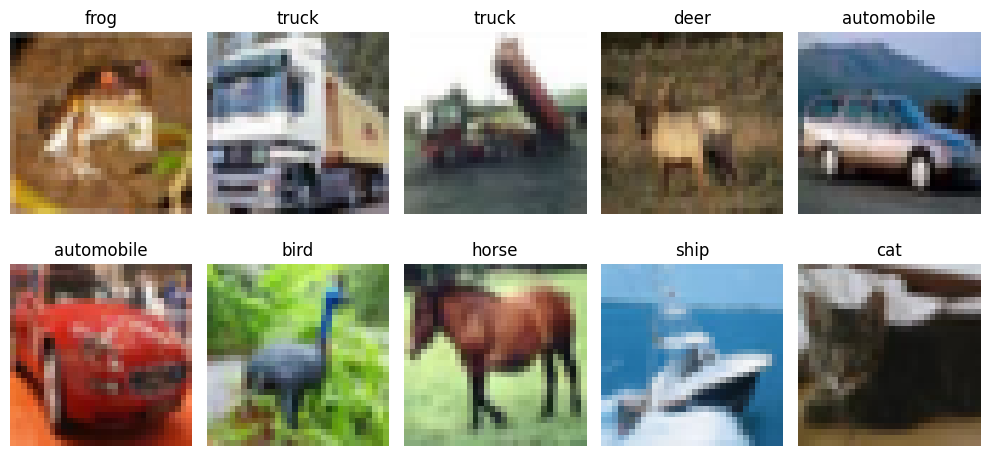

In [4]:
class_names = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}


plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i].item()])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [5]:
y_train=y_train.reshape (-1,)

In [6]:
def plot_image(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(class_names[y[index]],fontsize=15)


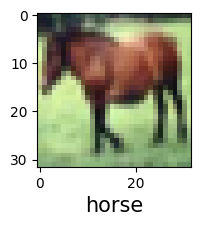

In [7]:
plot_image(X_train,y_train, 7)

In [8]:
X_train =X_train/255
X_test = X_test/255

## Building CNN

In [9]:
model1 = Sequential([
    layers.Input(shape=(32,32,3)),
    # Input shape is 32x32 pixels with 3 color channel (RGB)
    Conv2D(32, (3,3), activation='relu'),
    # Max pooling layer to reduce spatial dimensions by a factor of 2
    MaxPooling2D(2,2),
    # Second convolutional layer with 64 filters, 3x3 kernel, ReLU activation
    Conv2D(64, (3,3), activation='relu'),
    # Another max pooling layer to reduce size further
    MaxPooling2D(2,2),
    # Flatten the 2D feature maps into a 1D vector for dense layers
    Flatten(),
    # Fully connected (dense) layer with 128 neurons and ReLU activation
    #Learns intermediate features from the previous layers
    Dense(128, activation='relu'),
    # Output layer with 10 neurons (for 10 classes) and softmax activation
    #Produces the final probabilities for each class.
    Dense(10, activation='softmax')
    ],name="model1")

In [10]:
model1.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [11]:
model1.fit(X_train,y_train , epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4961 - loss: 1.4035
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6354 - loss: 1.0431
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6868 - loss: 0.9006
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7231 - loss: 0.7973
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7517 - loss: 0.7111
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7792 - loss: 0.6361
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8042 - loss: 0.5606
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8260 - loss: 0.4984
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8468 - loss: 0.4370
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8654 - loss: 0.3789


In [12]:
model1.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6930 - loss: 1.0855


[1.0855344533920288, 0.6930000185966492]

In [13]:
model1.save("cnnmodel_serg_v1c.keras")

In [14]:
y_test = y_test.reshape(-1,)

In [15]:
y_pred = model1.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [16]:
y_classes= [np.argmax(element) for  element in y_pred]

In [17]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.70      0.74      1000
           1       0.83      0.79      0.81      1000
           2       0.49      0.69      0.58      1000
           3       0.53      0.47      0.50      1000
           4       0.60      0.69      0.64      1000
           5       0.64      0.54      0.59      1000
           6       0.72      0.79      0.76      1000
           7       0.78      0.72      0.75      1000
           8       0.82      0.79      0.81      1000
           9       0.82      0.75      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



In [18]:
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model1.fit(X_train, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8877 - loss: 0.3257 - val_accuracy: 0.8699 - val_loss: 0.3557
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.9091 - loss: 0.2607 - val_accuracy: 0.8414 - val_loss: 0.4537
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9240 - loss: 0.2183 - val_accuracy: 0.8515 - val_loss: 0.4303
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9387 - loss: 0.1772 - val_accuracy: 0.8352 - val_loss: 0.5149
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9476 - loss: 0.1515 - val_accuracy: 0.8218 - val_loss: 0.5700
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9570 - loss: 0.1257 - val_accuracy: 0.8170 - val_loss: 0.6486
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9595 - loss: 0.1176 - val_accuracy: 0.8126 - val_loss: 0.6848
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9653 - loss: 0

In [19]:
#model1.save("colab_cnnmodel_serge_v1.keras")

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict class probabilities
y_pred_probs = model1.predict(X_test)

# Convert probabilities to class predictions
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test  # original integer labels

# Compute metrics
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='weighted')
rec = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.6765
Precision: 0.6827
Recall: 0.6765
F1 Score: 0.6772


## CNN Model EarlyStopping

- EarlyStopping is implemented in this model version in order to evaluate the overall influence of EarlyStopping on the model set to a patience of 3

In [21]:

# Setup EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',   # metric to monitor
    patience=3,           # stop if no improvement after 3 epochs
    restore_best_weights=True
)
# Train the model with early stopping
history = model1.fit(
    X_train, y_train,
    epochs=60,             # large max epochs, training will stop early if needed
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping]
)
# Evaluate the model
loss, accuracy = model1.evaluate(X_test, y_test)
print(f"Test accuracy with early stopping: {accuracy:.4f}")

Epoch 1/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9970 - loss: 0.0100 - val_accuracy: 0.7665 - val_loss: 1.6923
Epoch 2/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9999 - loss: 0.0015 - val_accuracy: 0.7745 - val_loss: 1.6905
Epoch 3/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 1.0000 - loss: 5.0207e-04 - val_accuracy: 0.7738 - val_loss: 1.7081
Epoch 4/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 1.0000 - loss: 3.4801e-04 - val_accuracy: 0.7745 - val_loss: 1.7268
Epoch 5/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 1.0000 - loss: 2.6533e-04 - val_accuracy: 0.7748 - val_loss: 1.7464
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6946 - loss: 3.2240
Test accuracy with early stopping: 0.6946


In [22]:
#model1.save("collab_cnnmodel_serg_esv2.keras")

## CNN Model EarlyStopping + Data Augmentation

-   Data Augmentation was added to the CNN model to address the previous issue where the model was falsely predicted different classes

In [23]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)

train_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
).flow(X_tr, y_tr, batch_size=64, shuffle=True, seed=42)

val_gen = ImageDataGenerator().flow(X_val, y_val, batch_size=64, shuffle=False)

history = model1.fit(train_gen, epochs=20, validation_data=val_gen)
loss, acc = model1.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {acc:.4f}")

/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.5853 - loss: 1.3266 - val_accuracy: 0.7485 - val_loss: 0.7300
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.6433 - loss: 1.0288 - val_accuracy: 0.7787 - val_loss: 0.6371
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.6673 - loss: 0.9621 - val_accuracy: 0.7885 - val_loss: 0.5941
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.6793 - loss: 0.9247 - val_accuracy: 0.7743 - val_loss: 0.6333
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.6946 - loss: 0.8857 - val_accuracy: 0.7836 - val_loss: 0.6298
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.6985 - loss: 0.8659 - val_accuracy: 0.7919 - val_loss: 0.5926
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.7031 - loss: 0.8500 - val_accuracy: 0.7961 - val_loss: 0.5803
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.7099 - loss: 0.8298 - 

In [ ]:
#model1.save("collab_cnnmodel_serg_dav3.keras")

## CNN Model EarlyStopping + Data Augmentation Further Optimizations

-   In order to further optimize the CNN model from above I added more layers and hyperparameter optimizations in order to evaluate their influence on the model.

In [25]:
from tensorflow.keras import layers, models, regularizers

def make_stronger_cnn(input_shape=(32,32,3), wd=1e-4, dr=0.5):
    return models.Sequential([
        layers.Input(shape=input_shape),

        # Block 1
        layers.Conv2D(32, 3, padding='same', activation='relu',
                      kernel_regularizer=regularizers.l2(wd)),
        layers.BatchNormalization(),
        layers.Conv2D(32, 3, padding='same', activation='relu',
                      kernel_regularizer=regularizers.l2(wd)),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Dropout(dr/2),

        # Block 2
        layers.Conv2D(64, 3, padding='same', activation='relu',
                      kernel_regularizer=regularizers.l2(wd)),
        layers.BatchNormalization(),
        layers.Conv2D(64, 3, padding='same', activation='relu',
                      kernel_regularizer=regularizers.l2(wd)),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Dropout(dr/2),

        # Block 3
        layers.Conv2D(128, 3, padding='same', activation='relu',
                      kernel_regularizer=regularizers.l2(wd)),
        layers.BatchNormalization(),
        layers.Conv2D(128, 3, padding='same', activation='relu',
                      kernel_regularizer=regularizers.l2(wd)),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Dropout(dr/2),

        # Classifier
        layers.Flatten(),
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(wd)),
        layers.Dropout(dr),
        layers.Dense(10, activation='softmax'),
    ])

In [ ]:
# 1. Create model
model2 = make_stronger_cnn(input_shape=(32,32,3), wd=1e-4, dr=0.5)

# 2. Compile
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 3. Train
history = model2.fit(X_train, y_train,
                    epochs=30,
                    batch_size=64,
                    validation_split=0.2)

# 4. Evaluate
loss, acc = model2.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {acc:.4f}")

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 131ms/step - accuracy: 0.3782 - loss: 1.8155 - val_accuracy: 0.3782 - val_loss: 1.8563
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 119ms/step - accuracy: 0.5442 - loss: 1.3631 - val_accuracy: 0.6349 - val_loss: 1.1180
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 121ms/step - accuracy: 0.6288 - loss: 1.1626 - val_accuracy: 0.6437 - val_loss: 1.1396
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 122ms/step - accuracy: 0.6801 - loss: 1.0327 - val_accuracy: 0.6983 - val_loss: 0.9938
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 131ms/step - accuracy: 0.7116 - loss: 0.9622 - val_accuracy: 0.7403 - val_loss: 0.8783
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 122ms/step - accuracy: 0.7382 - loss: 0.9047 - val_accuracy: 0.7611 - val_loss: 0.8462
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 120ms/step - accuracy: 0.7536 - loss: 0.8674 - val_accuracy: 0.7836 - val_loss: 0.7825
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 119ms/step - accuracy: 0.7711 - loss: 0

In [27]:
#model2.save("colab_cnn_serge_finalv4.keras")

## Transfer Learning Models

-   Pre-trained models from MobileNetV2 and EfficientNetB0 were trained and adapted to the CIFAR-10 dataset in order to compare their performance with the developed CNN models. 

-   Due to hardware computational limitations these models had to be trained on Google Colab.For code reference please refer to the Google Colab Notebooks. 

## Results and Insights

 **Results**
| ID | Model / Changes                     | Key Techniques                        | Test Accuracy |
|----|-------------------------------------|---------------------------------------|---------------|
| 1  | CNN v1 (baseline)                   | Plain architecture                    | 0.6765        |
| 2  | CNN v1 + EarlyStopping              | Early stopping (patience=3)           | 0.6946        |
| 3  | CNN v1 + Augmentation + EarlyStopping | ImageDataGenerator (flip/shift/zoom) + ES | 0.7415        |

**Takeaway:** EarlyStopping provided a small gain. Data augmentation gave a significant boost (+7 points vs. baseline).

---

#### Stronger Custom CNN (Model 2)

#### Architecture
- **Blocks:** 3 × (Conv2D → BN → Conv2D → BN → MaxPool → Dropout)
  - Filters: **32 → 64 → 128**
  - `padding='same'` for spatial preservation
- **Regularization:**  
  - **L2 weight decay (1e-4)** on Conv + Dense layers  
  - **Dropout:** 0.25 inside blocks, 0.5 before classifier
- **Classifier:** Flatten → Dense(256, ReLU) → Dropout(0.5) → Dense(10, Softmax)

#### Result
- **Test accuracy:** 0.8426

**Why it improved:**
- Deeper feature extraction (two convs per block, growing filters).
- BatchNorm stabilized activations.
- L2 + Dropout reduced overfitting.
- Larger dense head (256) captured richer combinations of features.

---

#### Transfer Learning — Pretrained Models

#### MobileNetV2
- **Input:** 32×32 → resized to 96×96
- **Preprocess:** `preprocess_input` ([-1,1] scaling)
- **Backbone:** MobileNetV2 (ImageNet, include_top=False, frozen)
- **Head:** GAP → Dropout(0.3) → Dense(10, softmax)
- **Training:** 10 epochs, LR=1e-4

**Result:**
- Test accuracy: **0.8486**
- Val accuracy: **0.8588**

**Why:** Pretrained features from ImageNet generalize well; lightweight, efficient model; Dropout head prevents overfitting.

---

#### EfficientNetB0
- **Input:** 32×32 → resized to 224×224
- **Preprocess:** none (EfficientNet includes Rescaling)
- **Backbone:** EfficientNetB0 (ImageNet, include_top=False)
  - **Phase 1:** base frozen, 10 epochs, LR=1e-4
  - **Phase 2:** fine-tune last ~30 layers, 10 epochs, LR=1e-5
- **Head:** GAP → Dropout(0.3) → Dense(10, softmax)

**Result:**
- Test accuracy: **0.9267**

**Why:** EfficientNetB0 is compound-scaled (depth, width, resolution balance), transfer learning plus careful fine-tuning adapts ImageNet features to CIFAR-10 with excellent generalization.

---

#### Final Comparison

| Model                                | Test Accuracy |
|--------------------------------------|---------------|
| CNN v1 (baseline)                    | 0.6765        |
| CNN v1 + EarlyStopping               | 0.6946        |
| CNN v1 + Aug + EarlyStopping         | 0.7415        |
| Stronger CNN (Model 2)               | 0.8426        |
| MobileNetV2 (transfer learning)      | 0.8486        |
| **EfficientNetB0 (transfer learning)** | **0.9267**    |

---

#### Key Takeaways
- **Baseline CNNs**: simple, interpretable, but limited (67–74%).  
- **Regularization + deeper CNN (Model 2):** major step up (84%).  
- **Transfer learning:** leveraging pretrained backbones gives a further jump: MobileNetV2 (85%), EfficientNetB0 (93%).  
- **Fine-tuning** with low LR on top layers is crucial to squeeze out the last gains.

---

## Summary of Hyperparameter Optimizations

### Baseline CNN — Model 1 v1
**Architecture**
```python
Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3))
MaxPooling2D(2,2)
Conv2D(64, (3,3), activation='relu')
MaxPooling2D(2,2)
Flatten()
Dense(128, activation='relu')
Dense(10, activation='softmax')

-   Loss: sparse_categorical_crossentropy
-   Optimizer: Adam
-   Epochs: 30
-   Training Accuracy:0.9853                    Validation Accuracy: 0.7517

-   Test Accuracy: 0.6765

- High loss 

###  CNN — Model 1 v2 +EarlyStopping


```python
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

-   Adds rotation, shifts, zoom, flips.
-   Combined with EarlyStopping.
-   Training Accuracy: 0.7567                       Validation Accuracy:0.7841

-   Test Accuracy: 0.7415

 Augmentation exposes the model to more variations → stronger generalization.


### CNN — Model 1 v3 +EarlyStopping + Data Augmentation

```python
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

-  Adds rotation, shifts, zoom, flips.
-   Combined with EarlyStopping.
-   Training Accuracy: 0.7567                       Validation Accuracy:0.7841

-   Test Accuracy: 0.7415

-  Augmentation exposes the model to more variations → stronger generalization.

### Stronger CNN — Model 2 

```python
Conv2D(..., kernel_regularizer=l2(1e-4))
BatchNormalization()
Dropout(0.25) inside blocks
Dense(256, activation='relu', kernel_regularizer=l2(1e-4))
Dropout(0.5) before final classifier

-   3 Conv blocks: 32 → 64 → 128 filters
-   Two conv layers per block with padding='same'
-   BatchNormalization after each Conv
-   L2 regularization (1e-4) on Conv + Dense layers
-   Dropout: 0.25 inside blocks, 0.5 before classifier
-   Larger Dense layer: 256 units
-   Training Accuracy: 0.8950                           Validation Accuracy : 0.8414

-   Test Accuracy: 0.8426                             

 Deeper network + BatchNorm = better feature extraction

 L2 + Dropout = reduced overfitting

 Denser classifier captures richer features

### Transfer Learning - MobileNetV2 


```python
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(96,96,3))
base_model.trainable = False
x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.3)(x)
output = Dense(10, activation='softmax')(x)

-   Input resized: 32×32 → 96×96
-   Preprocessing: preprocess_input ([-1,1] scaling)
-   Base frozen (ImageNet weights as feature extractor)
-   Custom head: GAP → Dropout(0.3) → Dense(10)
-   Training Accuracy:0.8486.        Validation Accuracy: 0.8588

-   Test Accuracy: 0.8561

  Pretrained ImageNet features outperform scratch CNNs.

  Lightweight MobileNet handles small images well.

### Transfer Learning - EfficientNetB0 (Frozen layers + Fine Tuning)


```python
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224,224,3))
base_model.trainable = False   # Phase 1

# Head
x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.3)(x)
output = Dense(10, activation='softmax')(x)

# Phase 2: fine-tune last 30 layers
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

-   Input resized: 32×32 → 224×224
-   Labels one-hot (to_categorical) → categorical crossentropy
-   Phase 1: frozen base, train head (10 epochs, LR=1e-4)
-   Phase 2: fine-tune last ~30 layers (10 epochs, LR=1e-5)
-   Training Accuracy: 0.9183.      Validation Accuracy: 0.9267

-   Test Accuracy: 0.9267

Compound scaling (depth/width/resolution) → stronger feature extractor

Two-phase training lets EfficientNet adapt features to CIFAR-10

Fine-tuning with low LR avoids catastrophic forgetting

### Key Takeaways

-	EarlyStopping: prevents overfitting (+2 points).

-	Data Augmentation: improves generalization (+5 points).

-	BatchNorm + L2 + Dropout: stronger CNN with regularization (+10 points).

-	MobileNetV2: pretrained features outperform scratch CNNs (+0.6 points vs Model 2).

-	EfficientNetB0: fine-tuned transfer learning achieves state-of-the-art (93%).